# <font style="color:blue">Project 2: Kaggle Competition - Classification</font>

#### Maximum Points: 100

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Section</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Data Loader</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Configuration</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Evaluation Metric</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>Train and Validation</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>Model</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>6</h3></td> <td><h3>Utils</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>7</h3></td> <td><h3>Experiment</h3></td><td><h3>5</h3></td> </tr>
        <tr><td><h3>8</h3></td> <td><h3>TensorBoard Dev Scalars Log Link</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>9</h3></td> <td><h3>Kaggle Profile Link</h3></td> <td><h3>50</h3></td> </tr>
    </table>
</div>


## <font style="color:green"> 0. General Imports

In [1]:
''' 
    Check which Python environemnt is running, by default in the CONDA base 
    To change to correct path, install the jupyterlab in the current CONDA
    environment.
    
'''
import sys
print('INFO: System executable path = ', sys.executable)

INFO: System executable path =  /home/prem/projects/dl_ml_ai/keynan_food_classifier/env/bin/python3.7


In [2]:
# Import Matplotlib and the plots in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import os for paths joining and other purposes
# Import time for displaying the time for each epoch 
import os
import time

In [4]:
# Import number python for libear algebra and quick processing 
import numpy as np 
# Import Data Processing, CSV file I/O 
import pandas as pd 
# Import collections
import collections

In [5]:
from PIL import Image

In [6]:
# Import Python torch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader, random_split
from torch.utils.data.sampler import WeightedRandomSampler
from torch.utils.tensorboard import SummaryWriter
from torch.optim.lr_scheduler import CyclicLR

In [7]:
# Import torchvision
from torchvision import transforms
from torchvision.transforms import functional as TF
from torchvision import models

In [8]:
# Import Dataclass
from dataclasses import dataclass

In [9]:
# Import scikit learn (science kit learn)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [10]:
# Some of the control constants to execute or not to.
is_resnext50_32x4d = False
is_resnext101_32x8d = True
is_resnet101 = False
is_weighted_entropy_loss = True
is_fc_dropout = True
is_fold = True

In [11]:
print("INFO: Torch Version is ", torch.__version__)
print("INFO: Torch CUDA Version is ", torch.version.cuda)


INFO: Torch Version is  1.5.0
INFO: Torch CUDA Version is  10.2


In [12]:
def is_cuda_device():
    if (torch.cuda.is_available()):
        return True
    else:
        return False

In [13]:
if (is_cuda_device):
    print("INFO: GPU avaible")
else:
    print("INFO: GPU is not available") 

INFO: GPU avaible


In [14]:
# Define data contants as a class, DataConfiguration
@dataclass
class DataConfiguration:
    input_data: str = 'data/input'
    images_data: str = 'images'
    output_data: str = 'data/output'
    train_file_name: str = 'train.csv'
    test_file_name: str = 'test.csv'    
    submission_file_name: str = 'submission.csv'
    split_ratio:int = 0.8
    model_dir:str = 'models'
    model_file_name:str = 'kenya_food_classifier.pt'
    image_re_size:int = 512
    image_crop_size:int = 512
    no_folds:int = 1

In [15]:
# Instance of the DataConfiguration        
data_config = DataConfiguration()

In [16]:
def create_models_dir():
    model_dir = data_config.model_dir
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

In [17]:
model_path = data_config.model_dir
create_models_dir()

In [18]:
# Get the train file name
def get_train_file_name():
    file_name = os.path.join(data_config.input_data,
                             data_config.train_file_name) 
    return file_name

In [19]:
# Get the test file name
def get_test_file_name():
    file_name = os.path.join(data_config.input_data,
                             data_config.test_file_name)
    return file_name

In [20]:
train_file_name = get_train_file_name()
print("INFO: Train and Validation File Name: ", train_file_name)

test_file_name = get_test_file_name()
print("INFO: Test File Name: ", test_file_name)

INFO: Train and Validation File Name:  data/input/train.csv
INFO: Test File Name:  data/input/test.csv


## <font style="color:green">1. Data Loader [10 Points]</font>

In this section, you have to write a class or methods that will be used to get training and validation data
loader.

You will have to write a custom dataset class to load data.

**Note that there are not separate validation data, so you will have to create your validation set by dividing train data into train and validation data. Usually, in practice, we do `80:20` ratio for train and validation, respectively.** 

For example,

```
class KenyanFood13Dataset(Dataset):
    """
    
    """
    
    def __init__(self, *args):
    ....
    ...
    
    def __getitem__(self, idx):
    ...
    ...
    
    
```

```
def get_data(args1, *agrs):
    ....
    ....
    return train_loader, test_loader
```

### <font style="color:green">1.1 Split the Training and Validation Data    

In [21]:
# Get the data frame
def get_df(file_name):
    df = pd.read_csv(file_name)
    return df

In [22]:
# Get Label classes
def get_labels(file_name):
    df = pd.read_csv(file_name)
    classes = train_valid_df['class'].unique().tolist()
    return classes

In [23]:
# Get the training data frmae
train_valid_df = get_df(train_file_name)

print("INFO: Number of Training and Validation Samples = ",
         len(train_valid_df))
#print(train_valid_df)

INFO: Number of Training and Validation Samples =  6536


In [24]:
labels = get_labels(train_file_name)
print("INFO: Classes are ")
print(labels)
no_classes = len(labels)
print("INFO: Number of class Lables = ", no_classes)

INFO: Classes are 
['githeri', 'ugali', 'kachumbari', 'matoke', 'sukumawiki', 'bhaji', 'mandazi', 'kukuchoma', 'nyamachoma', 'pilau', 'chapati', 'masalachips', 'mukimo']
INFO: Number of class Lables =  13


In [64]:
train_df, valid_df = train_test_split(train_valid_df, 
                                      train_size = data_config.split_ratio,
                                      random_state = 42)
                                           
print('INFO: Training Size = {}, Validation Size = {}'
      .format(len(train_df), len(valid_df)))

INFO: Training Size = 5228, Validation Size = 1308


In [26]:
# Get the Test data
test_df = get_df(test_file_name)
print("INFO: The Number of test samples = ", len(test_df))

INFO: The Number of test samples =  1638


In [27]:
# Image data path
images_data = os.path.join(data_config.input_data,
                           data_config.images_data, '')
print("INFO: Images data path = ", images_data)

INFO: Images data path =  data/input/images/


In [28]:
def get_df_data(indices):
    start = indices[0]
    end = indices[len(indices) - 1]
    data_df = train_valid_df[start:end+1]
    return data_df

### <font style="color:green">1.2 Folds    

In [29]:
if (is_fold):
    setattr(data_config, 'no_folds', 5)

In [30]:
def get_data_df(indices):        
    ids = []
    target_classes = []
    
    for index in range (len(indices)):
        indices_index = indices[index]
        image_id = train_valid_df['id'][indices_index]
        ids.append(image_id) 
        target = train_valid_df['class'][indices_index]
        target_classes.append(target)
    
        
    # dictionary of lists  
    dict = {'id': ids, 'class': target_classes}
    
    data_df = pd.DataFrame(dict)    
    
    return data_df

In [31]:
def get_fold_dfs():
    skf = StratifiedKFold(n_splits = data_config.no_folds, shuffle = True, random_state = 1)
    images = train_valid_df.id    
    targets = train_valid_df.loc[:, 'class']
    train_dfs = []
    train_dfs = []
    for train_index, valid_index in skf.split(images, targets):
        #print(" INFO: Fold Train: {}, length = {}".
        #          format(train_index, len(train_index)))
        #print(" INFO: Fold Validation: {}, length = {}".
        #          format(valid_index, len(valid_index)))
        fold_df = get_data_df(train_index)
        train_dfs.append(fold_df)
        fold_df = get_data_df(valid_index)
        valid_dfs.append(fold_df)
        
    return train_dfs, valid_dfs    

In [32]:
train_dfs = []
valid_dfs = []
if (is_fold):
    train_dfs, valid_dfs = get_fold_dfs()
else:
    train_dfs.append(train_df)
    valid_dfs.append(valid_df)

### <font style="color:green">1. Data Set Creation

In [33]:
class KenyaFoodDataset(Dataset):
    def __init__(self, df, images_path, transform, test = False):
        self.images_path = images_path
        self.df = df
        self.transform = transform
        self.test = test
            
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.images_path + str(self.df.iloc[idx, 0]) + '.jpg'
        image = Image.open(img_path)
        
        if self.transform is not None:
            img = self.transform(image)
            
        if self.test:
            sample = img            
        else:
            label_name = self.df.iloc[idx, 1]
            label = labels.index(label_name)
            sample = img, label
                
        return sample
        
    def __id__(self,idx):
        return self.df.iloc[idx, 0]
    
    def get_label(self, idx):
        label_name = self.df.iloc[idx, 1]
        label = labels.index(label_name)
        
        return label        

### <font style="color:green">1.3 Transformations

https://pytorch.org/hub/pytorch_vision_resnext/ for mean and std

In [34]:
# Mean and standard deviation for resnext
mean = [0.485, 0.456, 0.406] 
std = [0.229, 0.224, 0.225]

In [35]:
#define Transformations for training, validation, testing and display

train_tranform = transforms.Compose([
        transforms.Resize(data_config.image_re_size),
        transforms.CenterCrop(data_config.image_crop_size),
        transforms.RandomHorizontalFlip(p = 0.5),
        transforms.RandomRotation(degrees = (-90, 90)),
        transforms.ColorJitter(hue = .05, saturation = .05),
        transforms.RandomVerticalFlip(p = 0.5),
        transforms.RandomAffine(30, 
                                translate = None,
                                scale = None,
                                shear = None,
                                resample = False,
                                fillcolor = 0),
        transforms.ToTensor(),        
        transforms.Normalize(mean, std)
    ])

val_tranform = transforms.Compose([
        transforms.Resize(data_config.image_re_size),
        transforms.CenterCrop(data_config.image_crop_size),
        transforms.ToTensor(),        
        transforms.Normalize(mean, std)
    ])

test_tranform = transforms.Compose([
        transforms.Resize(data_config.image_re_size),
        transforms.CenterCrop(data_config.image_crop_size),
        transforms.ToTensor(),        
        transforms.Normalize(mean, std)
    ])

display_transform = transforms.Compose([
        transforms.Resize(data_config.image_re_size),
        transforms.CenterCrop(data_config.image_crop_size),
        transforms.ToTensor()
    ])    

In [36]:
# Prepare the data set for training, validation, and test
train_dataset = KenyaFoodDataset(train_df, images_data, train_tranform)
valid_dataset = KenyaFoodDataset(valid_df, images_data, val_tranform)
test_dataset =  KenyaFoodDataset(test_df, images_data, test_tranform, test = True)

In [37]:
# Check the correctness of the data set
def display_data_set():            
    idx = 500
    data_set = KenyaFoodDataset(valid_df, images_data, display_transform)
    img, target = data_set.__getitem__(idx)
    
    class_name = labels[target]    
    img = TF.to_pil_image(img)
    print('image size: {}, target Id: {}, target Class: {}'
          .format(img.size, target, class_name))

    plt.imshow(img)
    plt.show()            
    
#display_data_set()

In [38]:
def get_lables(data_set):
    labels = []
    data_set_length = len(data_set)
    
    for index in range (data_set_length):
        label = data_set.get_label(index)
        labels.append(label)
        
    labels = collections.Counter(labels)
    
    return labels

def display_labels_bar():
    train_labels = get_lables(train_dataset) 
    plt.bar(train_labels.keys(), train_labels.values())
    valid_labels = get_lables(val_dataset) 
    plt.bar(valid_labels.keys(), valid_labels.values())
    plt.show()
    
#display_labels_bar()

In [39]:
def get_dataset_weights(data_set):
    labels = []
    data_set_length = len(data_set)
    
    for index in range (data_set_length):
        label = data_set.get_label(index)
        labels.append(label)
        
    labels = collections.Counter(labels)
    #print(labels)
    
    target_weights = []
    
    for index in range(len(labels)):
        target_weights.append(labels[index])    
    
    #print(target_weights)
    #target_weights = [index / max(target_weights) for index in target_weights]
    target_weights = [1 - index / sum(target_weights) for index in target_weights]
    torch_target_weights = torch.FloatTensor(target_weights)      
        
    #print(target_weights)
    #print('Maximum value = ', max(target_weights))
    #print('Normalized Weights',torch_target_weights)
    
    return torch_target_weights   


In [40]:
def get_data(train_dataset, valid_dataset, batch_size, num_workers = 4):      
    train_loader = torch.utils.data.DataLoader(train_dataset, 
                                         batch_size = batch_size,
                                         num_workers = num_workers,
                                         shuffle = True)
    test_loader = torch.utils.data.DataLoader(valid_dataset, 
                                         batch_size = batch_size,
                                         num_workers = num_workers,
                                         shuffle = False)    
    return train_loader, test_loader

## <font style="color:green">2. Configuration [5 Points]</font>

Define your configuration in this section.

For example,

```
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 10 
    epochs_count: int = 20  
    init_learning_rate: float = 0.1  # initial learning rate for lr scheduler
    log_interval: int = 5  
    test_interval: int = 1  
    data_root: str = "/kaggle/input/pytorch-opencv-course-classification/" 
    num_workers: int = 2  
    device: str = 'cuda'  
    
```

In [41]:
@dataclass
class SystemConfiguration:
    '''
    Describes the common system setting needed for reproducible training
    '''
    seed: int = 21  # seed number to set the state of all random number generators
    cudnn_benchmark_enabled: bool = True  # enable CuDNN benchmark for the sake of performance
    cudnn_deterministic: bool = True  # make cudnn deterministic (reproducible training)

In [42]:
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    learning_rate: float = 0.001  
    batch_size: int = 16
    num_workers: int = 4  
    epochs_count: int = 20  
    decay_rate: float = 0.1
    log_interval: int = 500  
    test_interval: int = 1     
    device: str = 'cpu'

In [43]:
train_config =  TrainingConfiguration()
system_config =  SystemConfiguration()

if (is_cuda_device):
    setattr(train_config, 'device', 'cuda')
    setattr(train_config, 'batch_size', 4)
    setattr(train_config, 'num_workers', 2) 

In [44]:
def setup_system() -> None:
    torch.manual_seed(system_config.seed)
    if torch.cuda.is_available():
        torch.backends.cudnn_benchmark_enabled = system_config.cudnn_benchmark_enabled
        torch.backends.cudnn.deterministic = system_config.cudnn_deterministic

## <font style="color:green">3. Evaluation Metric [10 Points]</font>

Define methods or classes that will be used in model evaluation, for example, accuracy, f1-score, etc.

## <font style="color:green">4. Train and Validation [5 Points]</font>

Write the methods or classes that will be used for training and validation.

In [45]:
def train(
    model: nn.Module, 
    optimizer: torch.optim.Optimizer,
    train_loader: torch.utils.data.DataLoader,
    train_dataset: torch.utils.data.Dataset,
    epoch_idx: int
) -> None:
    
    # change model in training mood
    model.train()
    
    # to get batch loss
    batch_loss = np.array([])
    
    # to get batch accuracy
    batch_acc = np.array([])
    
    if (is_weighted_entropy_loss):
        train_weights = get_dataset_weights(train_dataset)
        train_weights = train_weights.to(train_config.device)
    
    for batch_idx, (data, target) in enumerate(train_loader):        
        # clone target
        indx_target = target.clone()
        # send data to device (its is medatory if GPU has to be used)
        data = data.to(train_config.device)
        # send target to device
        target = target.to(train_config.device)

        # reset parameters gradient to zero
        optimizer.zero_grad()
        
        # forward pass to the model
        output = model(data)
        
         # cross entropy loss
            
        if (is_weighted_entropy_loss):
            criterion = nn.CrossEntropyLoss(weight = train_weights)
            loss = criterion(output, target)
        else:
            loss = F.cross_entropy(output, target)
                 
        
        # find gradients w.r.t training parameters
        loss.backward()
        # Update parameters using gardients
        optimizer.step()
        
        batch_loss = np.append(batch_loss, [loss.item()])
        
        # Score to probability using softmax
        prob = F.softmax(output, dim=1)
            
        # get the index of the max probability
        pred = prob.data.max(dim=1)[1]  
                        
        # correct prediction
        correct = pred.cpu().eq(indx_target).sum()
            
        # accuracy
        acc = float(correct) / float(len(data))
        
        batch_acc = np.append(batch_acc, [acc])
        
        if batch_idx % train_config.log_interval == 0 and batch_idx > 0:

            total_batch = epoch_idx * \
                    len(train_loader.dataset) / train_config.batch_size + batch_idx            
            
            
    epoch_loss = batch_loss.mean()
    epoch_acc = batch_acc.mean()
    print('\nEpoch: {} \nTrain Loss: {:.6f} Acc: {:.4f}'.format(
            epoch_idx, epoch_loss, epoch_acc))
    
    return epoch_loss, epoch_acc        

In [46]:
def validate(    
    model: nn.Module,
    test_loader: torch.utils.data.DataLoader,
    test_dataset: torch.utils.data.Dataset
) -> float:
    # 
    model.eval()
    test_loss = 0
    count_corect_predictions = 0
    
    if (is_weighted_entropy_loss):
        valid_weights = get_dataset_weights(test_dataset)
        valid_weights = valid_weights.to(train_config.device)
    
    for data, target in test_loader:
        indx_target = target.clone()
        data = data.to(train_config.device)
        
        target = target.to(train_config.device)
        
        output = model(data)
        # add loss for each mini batch
        if (is_weighted_entropy_loss):        
            criterion = nn.CrossEntropyLoss(weight = valid_weights)
            test_loss += criterion(output, target).item()
        else:
            test_loss += F.cross_entropy(output, target).item()      
        
        
        # Score to probability using softmax
        prob = F.softmax(output, dim=1)
        
        # get the index of the max probability
        pred = prob.data.max(dim=1)[1] 
        
        # add correct prediction count
        count_corect_predictions += pred.cpu().eq(indx_target).sum()

    # average over number of mini-batches
    test_loss = test_loss / len(test_loader)  
    
    # average over number of dataset
    accuracy = 100. * count_corect_predictions / len(test_loader.dataset)
    
    print(
        'Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
            test_loss, count_corect_predictions, len(test_loader.dataset), accuracy
        )
    )
    
    return test_loss, accuracy/100.0

In [47]:
def save_model(model, 
               model_file_name):    
    model_file_path = os.path.join(model_path, model_file_name)

    # make sure you transfer the model to cpu.
    if train_config.device == 'cuda':
        model.to('cpu')

    # save the state_dict 
    torch.save(model.state_dict(), model_file_path)
    
    if train_config.device == 'cuda':
        model.to('cuda')
    
    return

In [48]:
def load_model(model, 
               model_file_name):
    model_file_path = os.path.join(model_path, model_file_name)
    
    # loading the model and getting model parameters by using load_state_dict
    model.load_state_dict(torch.load(model_file_path))
    
    return model

In [49]:
def main(model, 
         optimizer, 
         scheduler, 
         ):
    
    # system configuration
    setup_system()        
      
     
    # send model to device (GPU/CPU)
    model.to(train_config.device)

    best_loss = torch.tensor(np.inf)
    
    # epoch train/test loss
    epoch_train_loss = np.array([])
    epoch_test_loss = np.array([])
    
    # epch train/test accuracy
    epoch_train_acc = np.array([])
    epoch_test_acc = np.array([])
    
    # trainig time measurement
    t_begin = time.time()
    for fold_idx in range(data_config.no_folds):
        train_df = train_dfs[fold_idx]
        valid_df = valid_dfs[fold_idx]
        
        train_dataset = KenyaFoodDataset(train_df, images_data, train_tranform)
        valid_dataset = KenyaFoodDataset(valid_df, images_data, val_tranform)
        
        # data loader
        train_loader, test_loader = get_data(
                train_dataset = train_dataset,
                valid_dataset = valid_dataset,
                batch_size = train_config.batch_size,
                num_workers = train_config.num_workers       
            )  
        
        for epoch in range(train_config.epochs_count):
             
            # Train
            train_loss, train_acc = train(model, optimizer, train_loader, train_dataset, epoch)        
            epoch_train_loss = np.append(epoch_train_loss, [train_loss])        
            epoch_train_acc = np.append(epoch_train_acc, [train_acc])        

            elapsed_time = time.time() - t_begin
            speed_epoch = elapsed_time / (epoch + 1)
            speed_batch = speed_epoch / len(train_loader)
            eta = speed_epoch * train_config.epochs_count - elapsed_time

            print(
                "Elapsed {:.2f}s, {:.2f} s/epoch, {:.2f} s/batch, ets {:.2f}s".format(
                    elapsed_time, speed_epoch, speed_batch, eta))
        
        
            # Validate
            if epoch % train_config.test_interval == 0:
                current_loss, current_accuracy = validate(model, test_loader, valid_dataset)            
                epoch_test_loss = np.append(epoch_test_loss, [current_loss])        
                epoch_test_acc = np.append(epoch_test_acc, [current_accuracy])            
            
                if current_loss < best_loss:
                    best_loss = current_loss
                    print('Model Improved. Saving the Model...')
                    save_model(model, data_config.model_file_name)
                
            # scheduler step/ update learning rate
            if scheduler is not None:
                scheduler.step()
                
        print("INFO: Fold id {} Completed".format(fold_idx))
    
    print("Total time: {:.2f}, Best Loss: {:.3f}".format(
            time.time() - t_begin, best_loss))
    
    return model, epoch_train_loss, epoch_train_acc, \
        epoch_test_loss, epoch_test_acc

In [50]:
def get_optimizer_and_scheduler(model):    
    # optimizer    
    optimizer = optim.SGD(model.parameters(), 
                          lr = train_config.learning_rate, 
                          momentum = 0.9)    
    # scheduler
    scheduler = lr_scheduler.StepLR(optimizer, step_size = 7, gamma = 0.1)    
    
    return optimizer, scheduler

In [51]:
def pretrained_resnet(num_class):
    #print("INFO: Pre Trained Model")
    
    if (is_resnext50_32x4d):
        resnet = models.resnext50_32x4d(pretrained = True)
 
    if (is_resnext101_32x8d):
        resnet = models.resnext101_32x8d(pretrained = True)
        
    if (is_resnet101):
        resnet = models.resnet101(pretrained = True)
   
    
    #Resnet has 10 layers, free 7 layers
    count = 0
    for child in resnet.children():
        count+=1
        
        if (count < 7):
            for param in child.parameters():
                param.requires_grad = False       
    
    
    last_layer_in = resnet.fc.in_features
    
    if (is_fc_dropout):
        classifier = nn.Sequential(            
            nn.Linear(in_features = last_layer_in, out_features = 1024),        
            nn.ReLU(inplace = True), 
            nn.Dropout(0.5),            
            nn.Linear(in_features = 1024, out_features = 512),        
            nn.ReLU(inplace = True), 
            nn.Dropout(0.5),            
            nn.Linear(in_features = 512, out_features = num_class),
            
        )       
        resnet.fc = classifier
    else:
        resnet.fc = nn.Linear(last_layer_in, num_class)        
        
    return resnet

## <font style="color:green">5. Model [5 Points]</font>

Define your model in this section.

**You are allowed to use any pre-trained model.**

In [52]:
# training starts here
####*** FINE TUNING ***####

model = pretrained_resnet(no_classes)
# get optimizer and scheduler
optimizer, scheduler = get_optimizer_and_scheduler(model)

In [53]:
model, train_loss, train_acc, val_loss, val_acc = main(model, 
                                                       optimizer,                                                       
                                                       scheduler)


Epoch: 0 
Train Loss: 2.089034 Acc: 0.3194
Elapsed 491.82s, 491.82 s/epoch, 0.38 s/batch, ets 4426.41s
Test set: Average loss: 1.3425, Accuracy: 788/1308 (60%)
Model Improved. Saving the Model...

Epoch: 1 
Train Loss: 1.497471 Acc: 0.5337
Elapsed 1034.80s, 517.40 s/epoch, 0.40 s/batch, ets 4139.21s
Test set: Average loss: 1.1058, Accuracy: 899/1308 (69%)
Model Improved. Saving the Model...

Epoch: 2 
Train Loss: 1.265070 Acc: 0.6092
Elapsed 1575.86s, 525.29 s/epoch, 0.40 s/batch, ets 3677.01s
Test set: Average loss: 1.1082, Accuracy: 927/1308 (71%)

Epoch: 3 
Train Loss: 1.142103 Acc: 0.6524
Elapsed 2113.73s, 528.43 s/epoch, 0.40 s/batch, ets 3170.60s
Test set: Average loss: 1.0487, Accuracy: 966/1308 (74%)
Model Improved. Saving the Model...

Epoch: 4 
Train Loss: 1.019505 Acc: 0.6909
Elapsed 2654.71s, 530.94 s/epoch, 0.41 s/batch, ets 2654.71s
Test set: Average loss: 1.1497, Accuracy: 988/1308 (76%)

Epoch: 5 
Train Loss: 0.961530 Acc: 0.7148
Elapsed 3193.94s, 532.32 s/epoch, 0.41 

## <font style="color:green">6. Utils [5 Points]</font>

Define your methods or classes which are not covered in the above sections.

In [54]:
def plot_loss_accuracy(train_loss, val_loss, train_acc, val_acc, colors, 
                       loss_legend_loc='upper center', acc_legend_loc='upper left', 
                       fig_size=(20, 10), sub_plot1=(1, 2, 1), sub_plot2=(1, 2, 2)):
    
    plt.rcParams["figure.figsize"] = fig_size
    fig = plt.figure()
    
    plt.subplot(sub_plot1[0], sub_plot1[1], sub_plot1[2])
    
    for i in range(len(train_loss)):
        x_train = range(len(train_loss[i]))
        x_val = range(len(val_loss[i]))
        
        min_train_loss = train_loss[i].min()
        
        min_val_loss = val_loss[i].min()
        
        plt.plot(x_train, train_loss[i], linestyle='-', color='tab:{}'.format(colors[i]), 
                 label="TRAIN LOSS ({0:.4})".format(min_train_loss))
        plt.plot(x_val, val_loss[i], linestyle='--' , color='tab:{}'.format(colors[i]), 
                 label="VALID LOSS ({0:.4})".format(min_val_loss))
        
    plt.xlabel('epoch no.')
    plt.ylabel('loss')
    plt.legend(loc=loss_legend_loc)
    plt.title('Training and Validation Loss')
        
    plt.subplot(sub_plot2[0], sub_plot2[1], sub_plot2[2])
    
    for i in range(len(train_acc)):
        x_train = range(len(train_acc[i]))
        x_val = range(len(val_acc[i]))
        
        max_train_acc = train_acc[i].max() 
        
        max_val_acc = val_acc[i].max() 
        
        plt.plot(x_train, train_acc[i], linestyle='-', color='tab:{}'.format(colors[i]), 
                 label="TRAIN ACC ({0:.4})".format(max_train_acc))
        plt.plot(x_val, val_acc[i], linestyle='--' , color='tab:{}'.format(colors[i]), 
                 label="VALID ACC ({0:.4})".format(max_val_acc))
        
    plt.xlabel('epoch no.')
    plt.ylabel('accuracy')
    plt.legend(loc=acc_legend_loc)
    plt.title('Training and Validation Accuracy')
    
    fig.savefig('sample_loss_acc_plot.png')
    plt.show()
    
    return

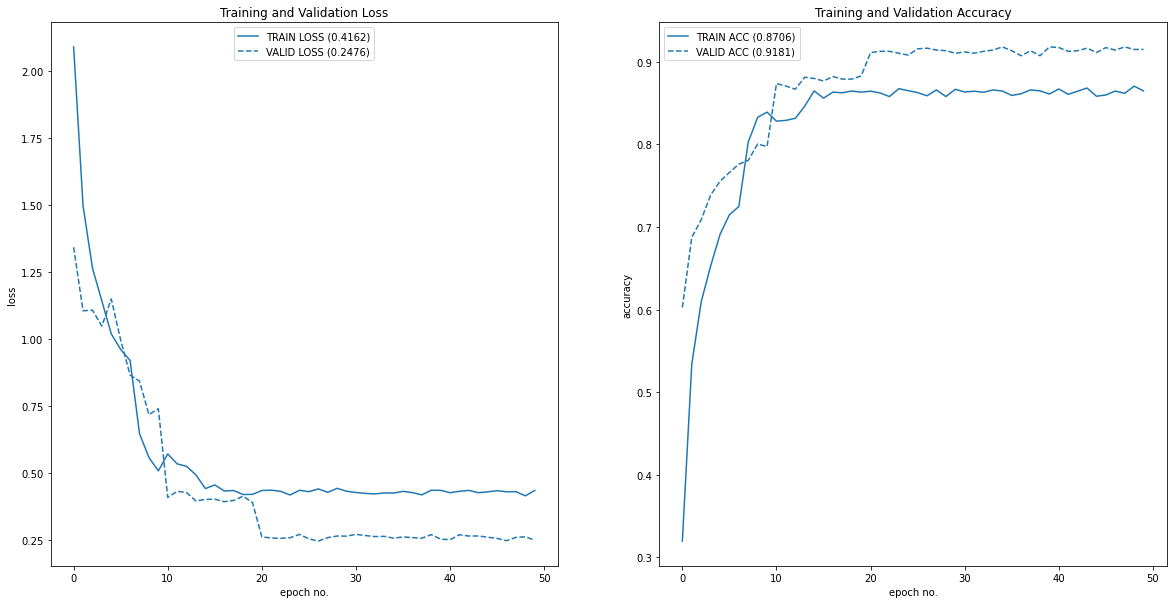

In [55]:
plot_loss_accuracy(train_loss=[train_loss], 
                   val_loss=[val_loss], 
                   train_acc=[train_acc], 
                   val_acc=[val_acc], 
                   colors=['blue'], 
                   loss_legend_loc='upper center', 
                   acc_legend_loc='upper left')

## <font style="color:green">7. Experiment [5 Points]</font>

Choose your optimizer and LR-scheduler and use the above methods and classes to train your model.

In [56]:
def prediction(model, batch_input,  max_prob = True):
    
    # send model to cpu/cuda according to your system configuration
    model.to(train_config.device)
    
    # it is important to do model.eval() before prediction
    model.eval()

    data = batch_input.to(train_config.device)

    output = model(data)

    # Score to probability using softmax
    prob = F.softmax(output, dim=1)

    # get the max probability
    if max_prob:
        # get the max probability
        pred_prob = prob.data.max(dim=1)[0]
    else:
        pred_prob = prob.data
    
    # get the index of the max probability
    pred_index = prob.data.max(dim=1)[1]
    
    return pred_index.cpu().numpy(), pred_prob.cpu().numpy()

In [57]:
def get_target_and_prob(model, loader):
    """
    get targets and prediction probabilities
    """
    
    pred_prob = []
    pred_targets = []
    
    for batch_id, data in enumerate(loader):
        
        pre_target, prob = prediction(model, data, max_prob = False)
        #print(pre_target)
        pred_prob.append(prob)                
        pred_targets.append(pre_target)
        
    pred_targets = np.concatenate(pred_targets)    
    pred_prob = np.concatenate(pred_prob, axis=0)
    
    return pred_targets, pred_prob

In [58]:
def get_test_predictions():
    test_dataset = KenyaFoodDataset(test_df, images_data, test_tranform, test = True)
    
    test_loader = torch.utils.data.DataLoader(test_dataset,
                                              batch_size = train_config.batch_size,
                                              num_workers = train_config.num_workers,
                                              shuffle = False)
    model = pretrained_resnet(no_classes)
    model = load_model(model, data_config.model_file_name)
    pred_targets, pred_prob = get_target_and_prob(model, test_loader)
  
    return pred_targets, pred_prob  

In [59]:
pred_targets, pred_prob = get_test_predictions()
print('INFO: No. of Predictions = ', len(pred_targets))

INFO: No. of Predictions =  1638


In [60]:
def confusion_matrix():
            
    val_loader = torch.utils.data.DataLoader(valid_dataset,
                                              batch_size = train_config.batch_size,
                                              num_workers = train_config.num_workers,
                                              shuffle = False)
    
    model = pretrained_resnet(no_classes)
    model = load_model(model,data_config.model_file_name)
    
    pred_prob = []
    predicts = []
    actuals = []
    for batch_id, (images, class_ids) in enumerate(val_loader):
        pre_target, prob = prediction(model, images, max_prob = False)
        
        pred_prob.append(prob)                
        predicts.append(pre_target)
        actuals.append(class_ids)
        
    predicts = np.concatenate(predicts)  
    actuals = np.concatenate(actuals) 
    
    unique_elements, counts_elements = np.unique(actuals, return_counts=True)
    print("INFO: Frequency of Actuals are:")
    print(np.asarray((unique_elements, counts_elements)))
    
    unique_elements, counts_elements = np.unique(predicts, return_counts=True)
    print("INFO: Frequency of Predicted are:")
    print(np.asarray((unique_elements, counts_elements)))
    
    result = np.zeros((no_classes, no_classes))
  
    for index in range(len(actuals)):
        result[actuals[index]][predicts[index]] += 1 
    return result

In [61]:
confusion_matrix = confusion_matrix()
print("INFO: Confusion Matrix")
print(confusion_matrix)

INFO: Frequency of Actuals are:
[[  0   1   2   3   4   5   6   7   8   9  10  11  12]
 [106 119  96  94  66 132 127  31 169  60 172  93  43]]
INFO: Frequency of Predicted are:
[[  0   1   2   3   4   5   6   8   9  10  11  12]
 [108 121 110  96  61 122 129 188  66 176  92  39]]
INFO: Confusion Matrix
[[103.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   2.]
 [  1. 101.   8.   1.   7.   0.   0.   0.   0.   0.   0.   1.   0.]
 [  2.   3.  86.   1.   1.   0.   0.   0.   2.   0.   1.   0.   0.]
 [  0.   1.   2.  87.   1.   0.   2.   0.   0.   0.   0.   0.   1.]
 [  1.  14.   2.   0.  47.   0.   0.   0.   0.   1.   1.   0.   0.]
 [  0.   1.   1.   1.   1. 121.   0.   0.   1.   3.   3.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 127.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   4.   0.   0.   0.   0.   0.  25.   1.   0.   1.   0.]
 [  1.   1.   6.   1.   1.   0.   0.   0. 158.   1.   0.   0.   0.]
 [  0.   0.   1.   1.   1.   0.   0.   0.   0.  57.   0.   0.   0.]
 [  0.   0.   0. 

In [62]:
def generate_submission(submission_file_name, targets, classes):  
       
    ids = []
    target_classes = []
    
    for index in range (test_df.shape[0]):
        image_id = test_df['id'][index]
        ids.append(image_id) 
        target = targets[index].item()
        target_classes.append(classes[target])
    
        
    # dictionary of lists  
    dict = {'id': ids, 'class': target_classes}
    
    submission_data_df = pd.DataFrame(dict)    
    submission_data_df.to_csv(submission_file_name, index = False)

In [63]:
# Get the test file name
submission_file_name = os.path.join(data_config.output_data, 
                                    data_config.submission_file_name)
print("INFO: Submission File Name = ", submission_file_name)
   
generate_submission(submission_file_name, pred_targets, labels)

INFO: Submission File Name =  data/output/submission.csv


## <font style="color:green">8. TensorBoard Dev Scalars Log Link [5 Points]</font>

Share your tensorboard scalars logs link in this section. You can also share (not mandatory) your GitHub link if you have pushed this project in GitHub. 

For example, [Find Project2 logs here](https://tensorboard.dev/experiment/kMJ4YU0wSNG0IkjrluQ5Dg/#scalars).

## <font style="color:green">9. Kaggle Profile Link [50 Points]</font>

Share your Kaggle profile link here with us so that we can give points for the competition score. 

You should have a minimum accuracy of `75%` on the test data to get all points. If accuracy is less than `70%`, you will not get any points for the section. 

**You must have to submit `submission.csv` (prediction for images in `test.csv`) in `Submit Predictions` tab in Kaggle to get any evaluation in this section.**